In [1]:
import json as js
import matplotlib.pyplot as plt


data = []
with open('data_fetching/sadscore_data.json', 'r') as input_file:
    data = js.load(input_file)
data[1]

{'_id': '5c0dc1ec9d6b972a6343384b',
 'form_type': 'men',
 'form_version': 1,
 'responses': {'above_platinum': {'name': 'above_platinum',
   'score': 0,
   'value': False},
  'always_offer_to_pay': {'name': 'always_offer_to_pay',
   'score': 3,
   'value': True},
  'asian_community_prominent_figure': {'name': 'asian_community_prominent_figure',
   'score': 0,
   'value': False},
  'attractiveness': {'name': 'attractiveness', 'score': 0, 'value': '6'},
  'church_going': {'name': 'church_going', 'score': 0, 'value': False},
  'degree_acceptable': {'name': 'degree_acceptable',
   'score': 0,
   'value': False},
  'degree_graduated': {'name': 'degree_graduated', 'score': 0, 'value': False},
  'degree_masters': {'name': 'degree_masters', 'score': 0, 'value': False},
  'degree_phd': {'name': 'degree_phd', 'score': 0, 'value': False},
  'degree_waste_of_time': {'name': 'degree_waste_of_time',
   'score': 0,
   'value': False},
  'dress_like_fuccboi': {'name': 'dress_like_fuccboi',
   'score': 

In [3]:
total_amount = len(data)-1
man_amount = 0

for x in data:
    if 'responses' in x:
        tmp = x['responses']
        if x['form_type'] == 'men':
            man_amount+=1

        
man_amount

1056

In [52]:
import collections
result = collections.defaultdict(int)
attract_score = []
iq_score = []
for x in data:
    if 'responses' in x:
        tmp = x['responses']
        for key,value in tmp.items():
            result[key] +=1 if value['value'] else 0
        if 'attractiveness' in tmp:
            attract_score.append(tmp['attractiveness']['value'])
        if 'iq_score' in tmp:
            iq_score.append(tmp['iq_score']['value'])
result

defaultdict(int,
            {'above_platinum': 197,
             'always_offer_to_pay': 652,
             'asian_community_prominent_figure': 209,
             'attractiveness': 1048,
             'church_going': 166,
             'degree_acceptable': 831,
             'degree_graduated': 295,
             'degree_masters': 144,
             'degree_phd': 105,
             'degree_waste_of_time': 57,
             'dress_like_fuccboi': 209,
             'dropped_out': 3,
             'english_non_fluent': 2,
             'english_only': 39,
             'foreign_langauges_fluent': 1048,
             'foreign_langauges_nonfluent': 1053,
             'gpa_acceptable': 396,
             'height_cm': 1053,
             'instrument_good': 332,
             'instruments': 1048,
             'iq_score': 1054,
             'job_unacceptable_not_student': 17,
             'kpop_dance_sing': 133,
             'let_the_girl_pay_if_she_wants': 462,
             'over_10k_instagram': 75,
          

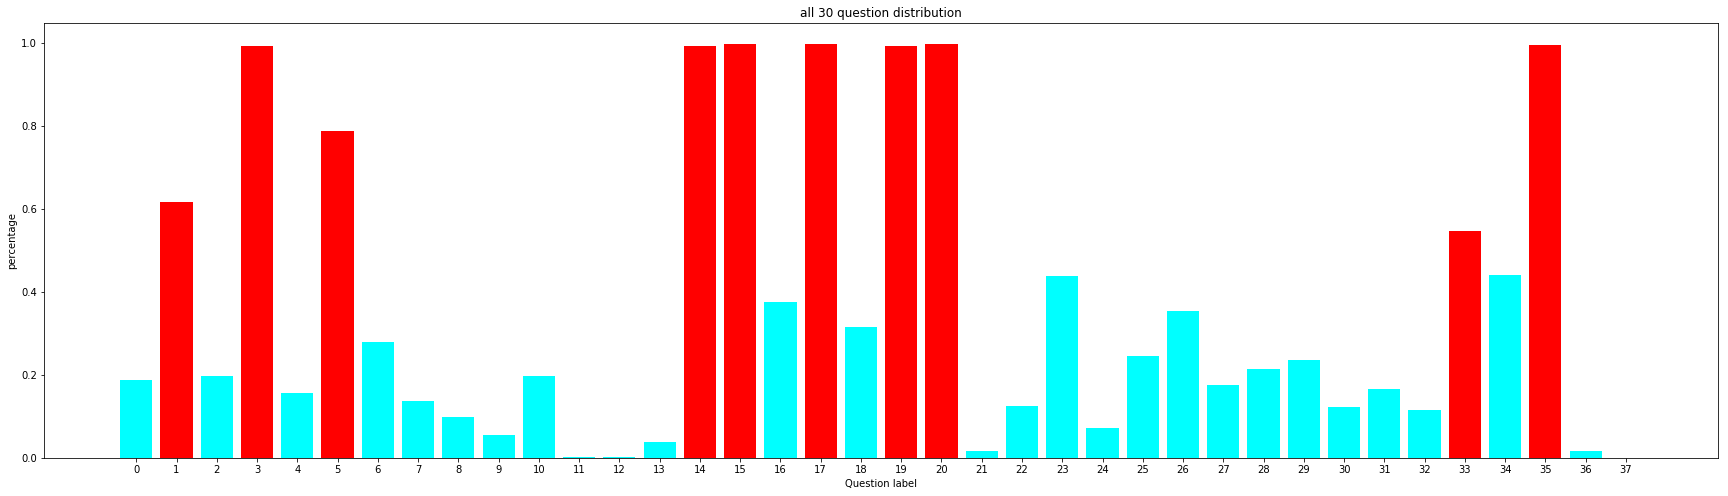

In [139]:
x = np.arange(len(result.keys()))
y = []
color = []
id_to_question = {}
good_question = []
i = 0
for key,val in result.items():
    id_to_question[i] = key
    i+=1
    y.append(val/1056)
    if val/1056 > 0.5:
        color.append('red')
        good_question.append(key)
    else:
        color.append('cyan')
plt.figure(figsize=(30,8))
plt.bar(x,y,color=color)
plt.xticks(x)
plt.xlabel('Question label')
plt.ylabel('percentage')
plt.title('all 30 question distribution')
plt.show()

In [140]:
good_question

['always_offer_to_pay',
 'attractiveness',
 'degree_acceptable',
 'foreign_langauges_fluent',
 'foreign_langauges_nonfluent',
 'height_cm',
 'instruments',
 'iq_score',
 'scored_yourself',
 'tattoos']

In [109]:

def mybarplot(x,y,title,xlabel,ylabel):

    plt.bar(x,y,facecolor='#9999ff', edgecolor='white')
    plt.xticks(np.arange(0,len(x)+1,step = len(x)//10))
    plt.xlabel('Score')
    plt.yticks(np.arange(0, max(y)+200, step=100))
    plt.ylabel('Number')
    for x, y in zip(x, y):
        plt.text(x, y ,'%s' %int(y), ha='center', va='bottom')
    plt.title('distribution of attractiveness given by self')
    plt.show()


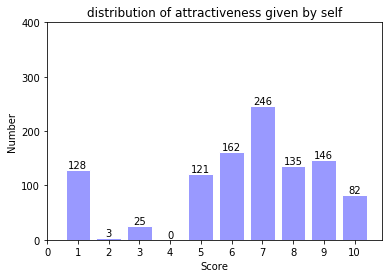

In [110]:
count_iq = collections.Counter(iq_score)
iq_x = np.arange(70,260)
iq_y = np.zeros(len(iq_x))
for key,val in count_iq.items():
    if not key:
        continue
    if int(key) >=260:
        iq_y[-1]+=1
    elif int(key)<=70:
        iq_y[0]+=1
    else:
        iq_y[int(key)-70] = int(val)
count_attract = collections.Counter(attract_score)


attract_x = np.arange(1,11)
attract_y = np.zeros(10)
for i in attract_x:
    if str(i) in count:
        attract_y[i-1] = count[str(i)]
mybarplot(attract_x,attract_y,'Attractiveness given by oneself','Score','Number')


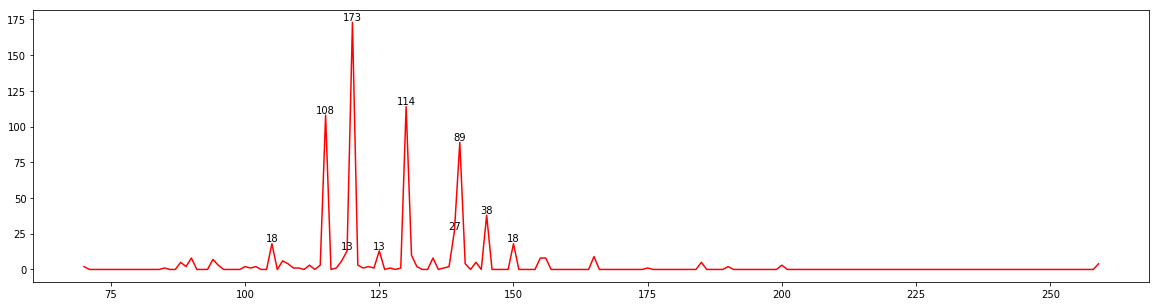

In [107]:

plt.figure(figsize=(20,5))
plt.plot(iq_x,iq_y,color='red', alpha=1.00)
for x, y in zip(iq_x, iq_y):
    if int(y)>10:
        plt.text(x, y ,'%s' %int(y), ha='center', va='bottom')
plt.show()


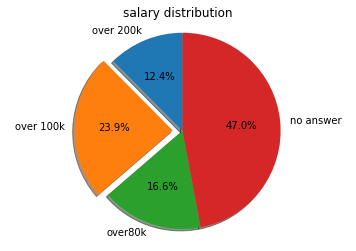

In [51]:
labels = ['over 200k','over 100k','over80k','no answer']
values = [result['salary_over_200k'],result['salary_over_100k'],result['salary_over_80k'],1056-390-174]
explode=(0,0.1,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Salary distribution")
plt.show()